In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
import plotly


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data science and visualization/pwt1001_data.csv')
df

,countrycode,year,Ic_Struc,Ic_Mach,Ic_TraEq,Ic_Other,Ip_Struc,Ip_Mach,Ip_TraEq,Ip_Other,...,Kc_TraEq,Kc_Other,Kp_Struc,Kp_Mach,Kp_TraEq,Kp_Other,Ksh_Struc,Ksh_Mach,Ksh_TraEq,Ksh_Other
0,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,ZWE,2015,595.0,1106.0,271.0,23.0,1.0,1.0,1.0,1.0,...,551.0,41.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12596,ZWE,2016,602.0,1116.0,274.0,24.0,1.0,1.0,1.0,1.0,...,585.0,45.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12597,ZWE,2017,635.0,1181.0,290.0,25.0,1.0,1.0,1.0,1.0,...,642.0,47.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12598,ZWE,2018,712.0,1228.0,301.0,22.0,1.0,1.0,1.0,1.0,...,712.0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


# DATA CLEANING

In [ ]:
df.dropna(inplace=True)
df.to_csv('out.csv', index=False)
df

,countrycode,year,Ic_Struc,Ic_Mach,Ic_TraEq,Ic_Other,Ip_Struc,Ip_Mach,Ip_TraEq,Ip_Other,...,Kc_TraEq,Kc_Other,Kp_Struc,Kp_Mach,Kp_TraEq,Kp_Other,Ksh_Struc,Ksh_Mach,Ksh_TraEq,Ksh_Other
41,ABW,1991,434.0,18.0,63.0,0.0,1.0,2.0,1.0,1.0,...,67.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
42,ABW,1992,495.0,20.0,49.0,0.0,1.0,2.0,1.0,1.0,...,69.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
43,ABW,1993,569.0,23.0,32.0,0.0,1.0,2.0,1.0,1.0,...,67.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
44,ABW,1994,709.0,29.0,16.0,0.0,1.0,2.0,1.0,1.0,...,63.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
45,ABW,1995,586.0,55.0,82.0,0.0,1.0,2.0,1.0,1.0,...,68.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,ZWE,2015,595.0,1106.0,271.0,23.0,1.0,1.0,1.0,1.0,...,551.0,41.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12596,ZWE,2016,602.0,1116.0,274.0,24.0,1.0,1.0,1.0,1.0,...,585.0,45.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12597,ZWE,2017,635.0,1181.0,290.0,25.0,1.0,1.0,1.0,1.0,...,642.0,47.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12598,ZWE,2018,712.0,1228.0,301.0,22.0,1.0,1.0,1.0,1.0,...,712.0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


# EDA

In [ ]:
import csv
eda = pd.read_csv('out.csv')
eda

,countrycode,year,Ic_Struc,Ic_Mach,Ic_TraEq,Ic_Other,Ip_Struc,Ip_Mach,Ip_TraEq,Ip_Other,...,Kc_TraEq,Kc_Other,Kp_Struc,Kp_Mach,Kp_TraEq,Kp_Other,Ksh_Struc,Ksh_Mach,Ksh_TraEq,Ksh_Other
0,ABW,1991,434.0,18.0,63.0,0.0,1.0,2.0,1.0,1.0,...,67.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
1,ABW,1992,495.0,20.0,49.0,0.0,1.0,2.0,1.0,1.0,...,69.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
2,ABW,1993,569.0,23.0,32.0,0.0,1.0,2.0,1.0,1.0,...,67.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
3,ABW,1994,709.0,29.0,16.0,0.0,1.0,2.0,1.0,1.0,...,63.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
4,ABW,1995,586.0,55.0,82.0,0.0,1.0,2.0,1.0,1.0,...,68.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,ZWE,2015,595.0,1106.0,271.0,23.0,1.0,1.0,1.0,1.0,...,551.0,41.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
7086,ZWE,2016,602.0,1116.0,274.0,24.0,1.0,1.0,1.0,1.0,...,585.0,45.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
7087,ZWE,2017,635.0,1181.0,290.0,25.0,1.0,1.0,1.0,1.0,...,642.0,47.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
7088,ZWE,2018,712.0,1228.0,301.0,22.0,1.0,1.0,1.0,1.0,...,712.0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
eda_p = eda[['countrycode', 'year', 'Ic_TraEq', 'Nc_TraEq','Np_TraEq','Dc_TraEq','Kc_TraEq','Kp_TraEq','Ksh_TraEq']]
eda_p

,countrycode,year,Ic_TraEq,Nc_TraEq,Np_TraEq,Dc_TraEq,Kc_TraEq,Kp_TraEq,Ksh_TraEq
0,ABW,1991,63.0,221.0,1.0,44.0,67.0,1.0,0.0
1,ABW,1992,49.0,228.0,1.0,48.0,69.0,1.0,0.0
2,ABW,1993,32.0,223.0,1.0,48.0,67.0,1.0,0.0
3,ABW,1994,16.0,214.0,1.0,48.0,63.0,1.0,0.0
4,ABW,1995,82.0,232.0,1.0,45.0,68.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
7085,ZWE,2015,271.0,956.0,1.0,191.0,551.0,1.0,0.0
7086,ZWE,2016,274.0,1027.0,1.0,207.0,585.0,1.0,0.0
7087,ZWE,2017,290.0,1107.0,1.0,224.0,642.0,1.0,0.0
7088,ZWE,2018,301.0,1185.0,1.0,241.0,712.0,1.0,0.0


In [ ]:
import csv

def create_new_csv_file(input_file, output_file, string):
    with open(input_file, 'r') as f_input, open(output_file, 'w', newline='') as f_output:
        reader = csv.reader(f_input)
        writer = csv.writer(f_output)
        writer.writerow(next(reader)) 
        for row in reader:
            if string in row:
                writer.writerow(row)


In [ ]:
country = input("Enter the name of the country you need to visualize(ABW, ZWE) : ")

Enter the name of the country you need to visualize(ABW, ZWE) : ZWE


In [ ]:
input_file = 'out.csv'
output_file = 'abw.csv'

create_new_csv_file(input_file, output_file, country)


In [ ]:
re = pd.read_csv(output_file)
re

,countrycode,year,Ic_Struc,Ic_Mach,Ic_TraEq,Ic_Other,Ip_Struc,Ip_Mach,Ip_TraEq,Ip_Other,...,Kc_TraEq,Kc_Other,Kp_Struc,Kp_Mach,Kp_TraEq,Kp_Other,Ksh_Struc,Ksh_Mach,Ksh_TraEq,Ksh_Other
0,ZWE,1958,31.0,12.0,4.0,0.0,0.0,0.0,0.0,4.0,...,14.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
1,ZWE,1959,23.0,9.0,3.0,0.0,0.0,0.0,0.0,4.0,...,14.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
2,ZWE,1960,24.0,9.0,3.0,0.0,0.0,0.0,0.0,4.0,...,13.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
3,ZWE,1961,25.0,10.0,3.0,0.0,0.0,0.0,0.0,4.0,...,13.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
4,ZWE,1962,20.0,7.0,3.0,0.0,0.0,0.0,0.0,4.0,...,12.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,ZWE,2015,595.0,1106.0,271.0,23.0,1.0,1.0,1.0,1.0,...,551.0,41.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
58,ZWE,2016,602.0,1116.0,274.0,24.0,1.0,1.0,1.0,1.0,...,585.0,45.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
59,ZWE,2017,635.0,1181.0,290.0,25.0,1.0,1.0,1.0,1.0,...,642.0,47.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
60,ZWE,2018,712.0,1228.0,301.0,22.0,1.0,1.0,1.0,1.0,...,712.0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


# Visualisation

In [51]:
re_p = re[['year', 'Ic_TraEq']]
re_p

,year,Ic_TraEq
0,1958,4.0
1,1959,3.0
2,1960,3.0
3,1961,3.0
4,1962,3.0
...,...,...
57,2015,271.0
58,2016,274.0
59,2017,290.0
60,2018,301.0


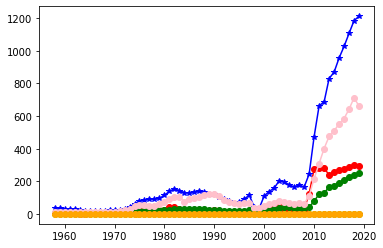

In [ ]:

plt.plot(re['year'], re['Ic_TraEq'], marker = 'o', color = 'red')
plt.plot(re['year'], re['Nc_TraEq'], marker = '*', color = 'b')

plt.plot(re['year'], re['Np_TraEq'], marker = 'o', color = 'y')
plt.plot(re['year'], re['Dc_TraEq'], marker = 'o', color = 'g')


plt.plot(re['year'], re['Kc_TraEq'], marker = 'o', color = 'pink')
plt.plot(re['year'], re['Kp_TraEq'], marker = '*', color = 'purple')
plt.plot(re['year'], re['Ksh_TraEq'], marker = 'o', color = 'orange')

<AxesSubplot:xlabel='year', ylabel='Ic_TraEq'>

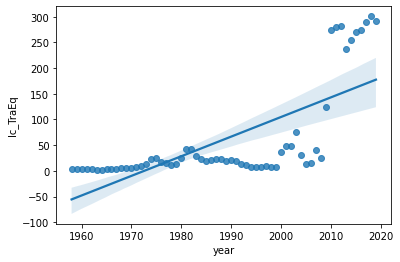

In [ ]:
sns.regplot(y='Ic_TraEq',x='year',data=re)

<AxesSubplot:xlabel='year', ylabel='Dc_TraEq'>

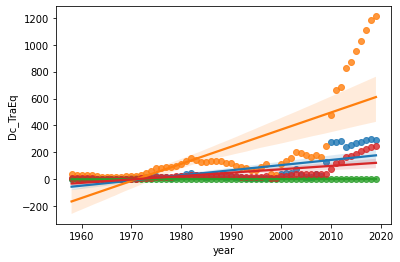

In [ ]:
sns.regplot(y='Ic_TraEq',x='year',data=re)
sns.regplot(y='Nc_TraEq',x='year',data=re)
sns.regplot(y='Np_TraEq',x='year',data=re)
sns.regplot(y='Dc_TraEq',x='year',data=re)

 Train the model

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
X = re_p.iloc[:, :-1].values
y = re_p.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Choose the model
regressor = LinearRegression()
#Train the model
regressor.fit(X_train, y_train)

#Evaluate the model
y_pred = regressor.predict(X_test)

#Asses the model performance
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean squared error:  4364.396950362119
Mean absolute error: 59.02367921413827
variance score: -3.466855447181853
Root Mean Squared Error: 66.0635826334155


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

print('Classification report:\n', classification_report(y_test, y_pred))

print('Accuracy score:', accuracy_score(y_test, y_pred))

Tune the model

In [81]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 2934.707378323713


In [85]:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4364.396950362119


prediction

In [86]:
X = re_p.drop('Ic_TraEq', axis=1)
y = re_p['Ic_TraEq']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 6205.095215333324
